**PROBLEM STATEMENT:**

*"Perform data cleaning and exploratory data analysis (EDA) on a dataset of your choice, such as the Titanic dataset from Kaggle. Explore the relationships between variables and identify patterns and trends in the data"*

# IMPORTING LIBRARIES

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# GETTING DATA

In [2]:
titanic_df = pd.read_csv('Titanic.csv')
titanic_df.head()                      #reads top 5 rows of data 

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


# EXPLORATORY DATA ANALYSIS (EDA)

In [3]:
titanic_df.info()          #getting information of data

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [4]:
titanic_df.describe().T          #statistical desctiption of data

,count,mean,std,min,25%,50%,75%,max
PassengerId,891.0,446.000000,257.353842,1.00,223.5000,446.0000,668.5,891.0000
Survived,891.0,0.383838,0.486592,0.00,0.0000,0.0000,1.0,1.0000
Pclass,891.0,2.308642,0.836071,1.00,2.0000,3.0000,3.0,3.0000
Age,714.0,29.699118,14.526497,0.42,20.1250,28.0000,38.0,80.0000
SibSp,891.0,0.523008,1.102743,0.00,0.0000,0.0000,1.0,8.0000
Parch,891.0,0.381594,0.806057,0.00,0.0000,0.0000,0.0,6.0000
Fare,891.0,32.204208,49.693429,0.00,7.9104,14.4542,31.0,512.3292


**From above description we get that :**
1. There are total 891 passenger record in our dataset.
2. Average age of passenger is around 30.
3. Average Fare price is around 32.20 (in dollars) and maximum fare price is around 512.32 (in dollars).

In [5]:
titanic_df.isna().sum()        #checking for null values

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [6]:
# filling age column with mean value of age column
titanic_df['Age'].fillna(titanic_df['Age'].mean(), inplace=True)   

# filling embarked coloumn with mode value of the column
titanic_df['Embarked'].fillna(titanic_df['Embarked'].mode()[0], inplace =True)

In [7]:
# dropping not necessary column 
titanic_df.drop(columns = ['PassengerId','Name','Cabin','Ticket'], axis=1, inplace = True)

In [8]:
titanic_df.info()        #checking for null values and column in our data frame

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Sex       891 non-null    object 
 3   Age       891 non-null    float64
 4   SibSp     891 non-null    int64  
 5   Parch     891 non-null    int64  
 6   Fare      891 non-null    float64
 7   Embarked  891 non-null    object 
dtypes: float64(2), int64(4), object(2)
memory usage: 55.8+ KB


In [9]:
titanic_df.duplicated().sum()   # checking for null values

111

In [10]:
titanic_df.nunique()           #checking unique values present in our data frame

Survived      2
Pclass        3
Sex           2
Age          89
SibSp         7
Parch         7
Fare        248
Embarked      3
dtype: int64

In [11]:
#checking statistical correlation between numeric columns
titanic_df.corr(numeric_only=True)     

,Survived,Pclass,Age,SibSp,Parch,Fare
Survived,1.000000,-0.338481,-0.069809,-0.035322,0.081629,0.257307
Pclass,-0.338481,1.000000,-0.331339,0.083081,0.018443,-0.549500
Age,-0.069809,-0.331339,1.000000,-0.232625,-0.179191,0.091566
SibSp,-0.035322,0.083081,-0.232625,1.000000,0.414838,0.159651
Parch,0.081629,0.018443,-0.179191,0.414838,1.000000,0.216225
Fare,0.257307,-0.549500,0.091566,0.159651,0.216225,1.000000


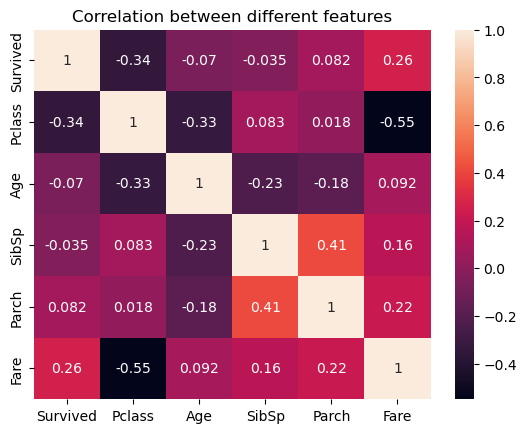

In [12]:
# plotting correlation matrix by using heatmap
sns.heatmap(titanic_df.corr(numeric_only=True),annot=True)
plt.title('Correlation between different features')
plt.show()

In [13]:
titanic_df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S


# DATA VISUALISATION

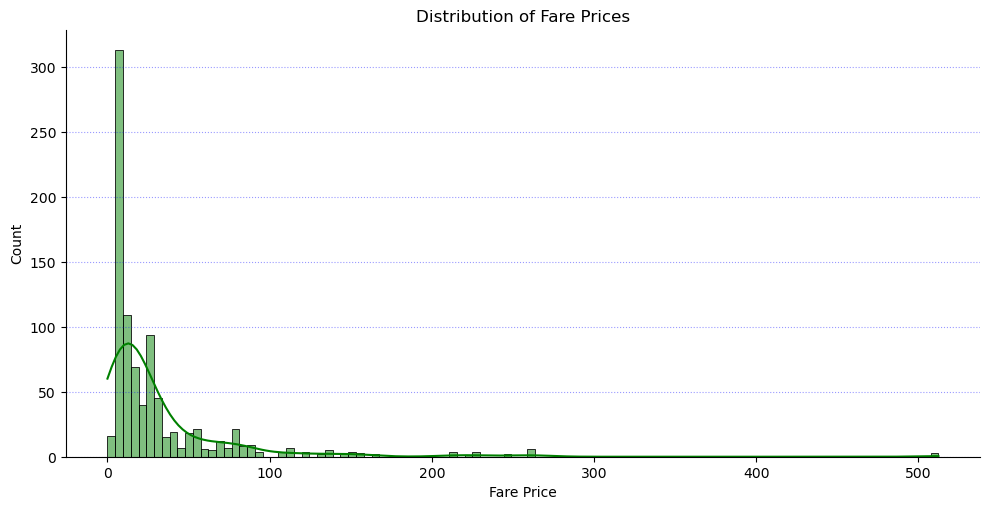

In [14]:
# plotting histogram for fare price
sns.displot(data=titanic_df, x= 'Fare', kde = True, aspect=2, color = 'Green')
plt.title('Distribution of Fare Prices')
plt.xlabel('Fare Price')
plt.ylabel('Count')
plt.grid(axis ='y', ls=':', alpha=0.4, color = 'b')
plt.show()

**OBSERVATION:**

From above distribution we can say that most of the ticket are sold in the price range of 1-50 dollars and from this we can determine that fare column is having high skewness.

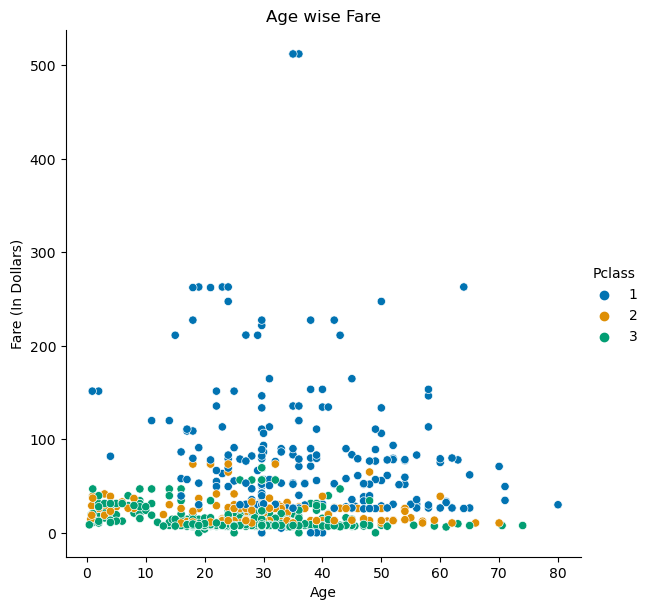

In [15]:
# plotting scatterplot 
sns.relplot(data=titanic_df, y='Fare',x='Age', kind='scatter',hue='Pclass',palette='colorblind',height=6)
plt.title('Age wise Fare')
plt.xlabel('Age')
plt.ylabel('Fare (In Dollars)')
plt.show()

**OBSERVATION:**

1. Most tickets are sold from 3rd class.
2. As expected 1st class tickets are costlier than class 2 and class 3

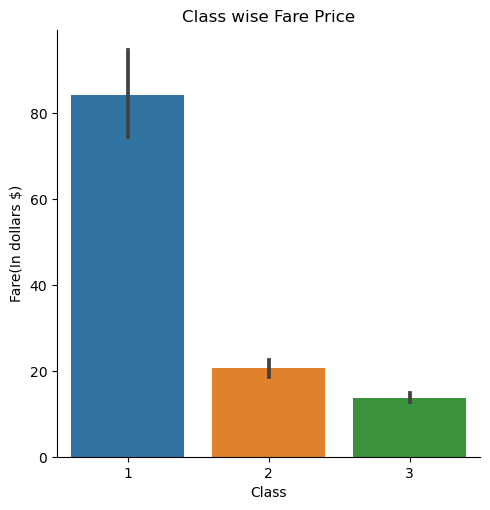

In [16]:
# ploting bar plot 
sns.catplot(data=titanic_df, x='Pclass',y='Fare',kind='bar')
plt.title('Class wise Fare Price')
plt.xlabel('Class')
plt.ylabel('Fare(In dollars $)')
plt.show()

**OBSERVATION:**

1. 1st class having highest fare price.
2. 3rd class having lowest fare price.

In [17]:
class_count = titanic_df['Pclass'].value_counts()     # counting values for each class 

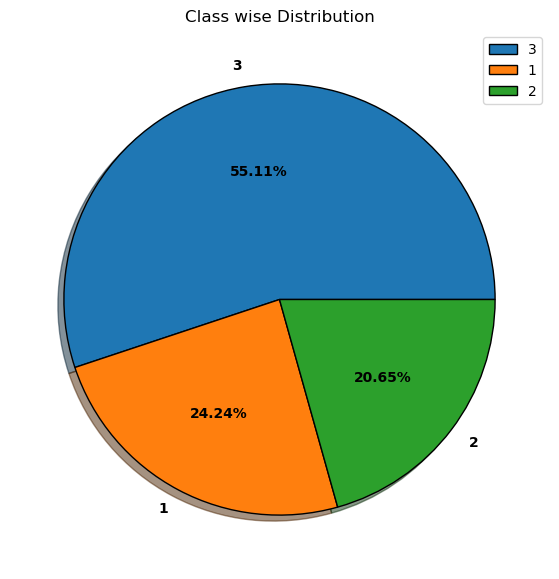

In [18]:
# setting figure size
plt.figure(figsize=(10,7)) 

# ploting pie chart for class counts
plt.pie(class_count, labels = class_count.index, autopct ='%.2f%%',shadow =True,
       wedgeprops={'linewidth':1,'edgecolor': 'black'},
       textprops={'weight':'bold'})
plt.legend()
plt.title('Class wise Distribution')
plt.show()

**OBSERVATION:**

1. From above pie chart we can observed that 3rd class tickets sold highest and is about 55.11%.
2. Lowest sale tickests are from 2nd class and is about 20.65%.

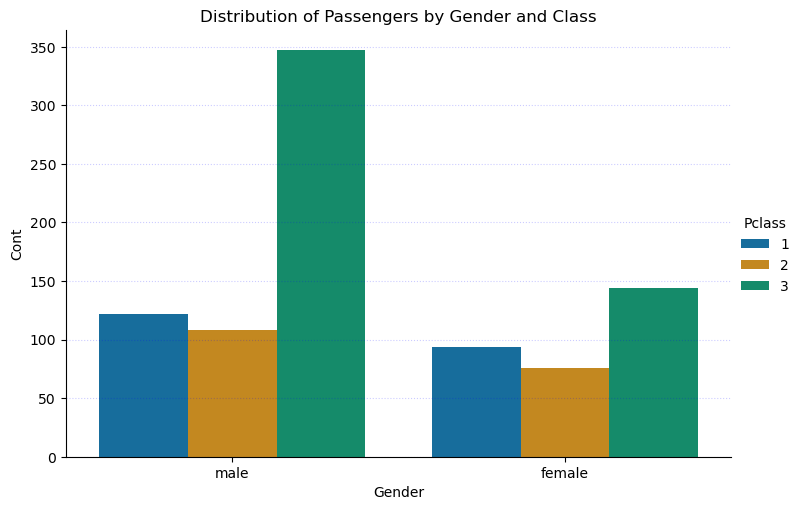

In [19]:
# plotting count plot 
sns.catplot(data=titanic_df, x='Sex',kind= 'count', hue='Pclass',palette='colorblind',aspect=1.5,height=5)
plt.title('Distribution of Passengers by Gender and Class')
plt.xlabel('Gender')
plt.ylabel('Cont')
plt.grid(axis='y', ls=':',color='b',alpha=0.2)
plt.show()

**OBSERVATIONS:**

1. From above observation we can determine that Most Male and Female travels from 3rd class.

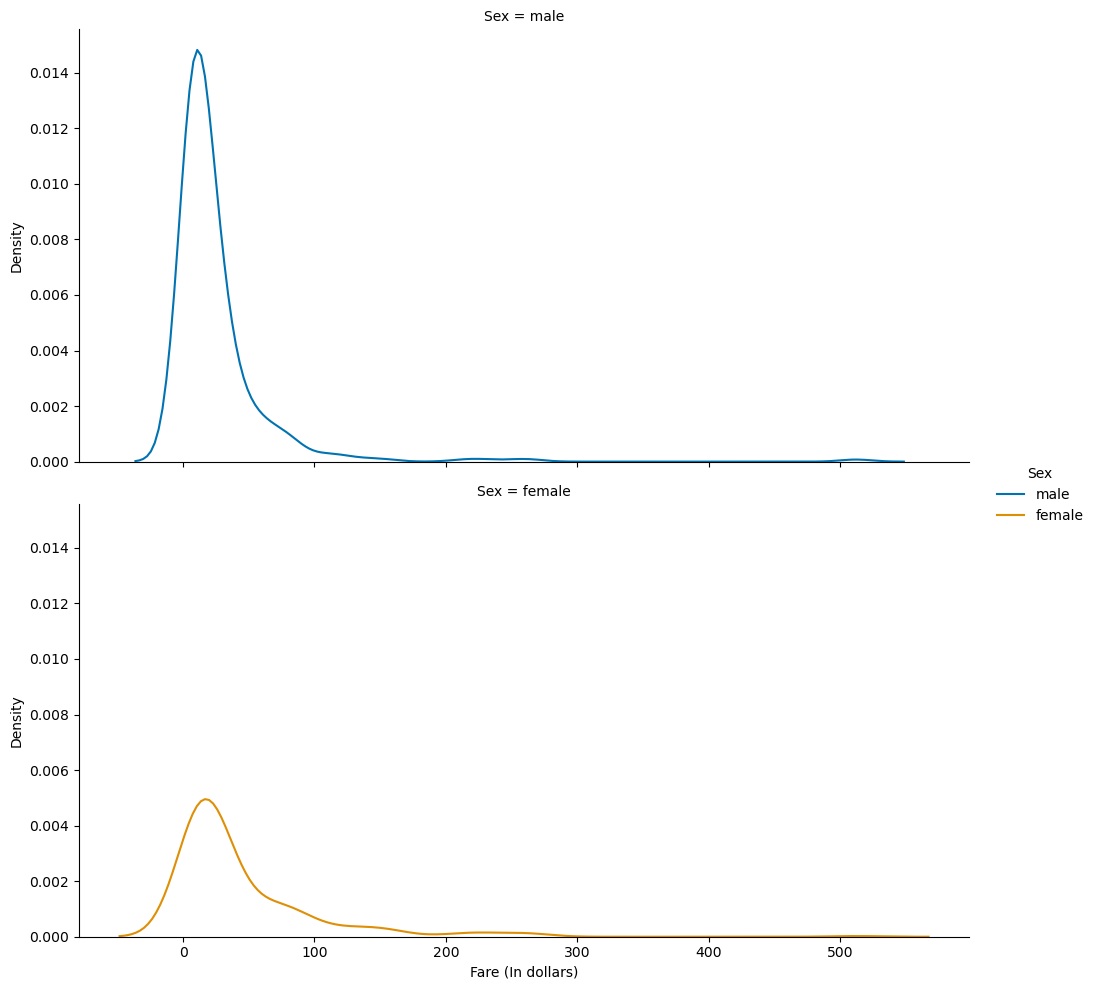

In [20]:
# plotting kernal desnsity estimation (KDE) plot.
sns.displot(data = titanic_df, x='Fare', hue = 'Sex',kind='kde', row = 'Sex',palette='colorblind',aspect=2)

plt.xlabel('Fare (In dollars)')
plt.ylabel('Density')
plt.show()

**OBSERVATION:**

Based on the analysis, it can be inferred that the number of male passengers is greater than the number of female passengers.

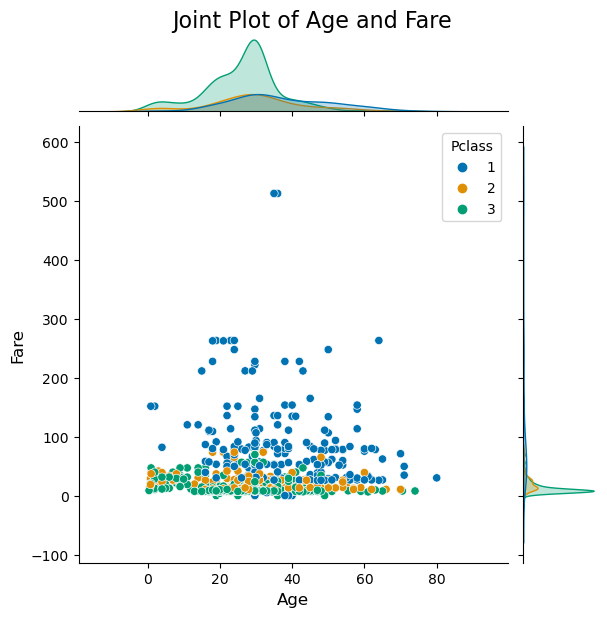

In [21]:
# plotting joint plot 
plot = sns.jointplot(data=titanic_df, x='Age', y='Fare',hue='Pclass',palette='colorblind')
plot.set_axis_labels('Age', 'Fare', fontsize=12)
plot.fig.suptitle('Joint Plot of Age and Fare', y=1.02, fontsize=16) #Giving title to plot
plt.show()

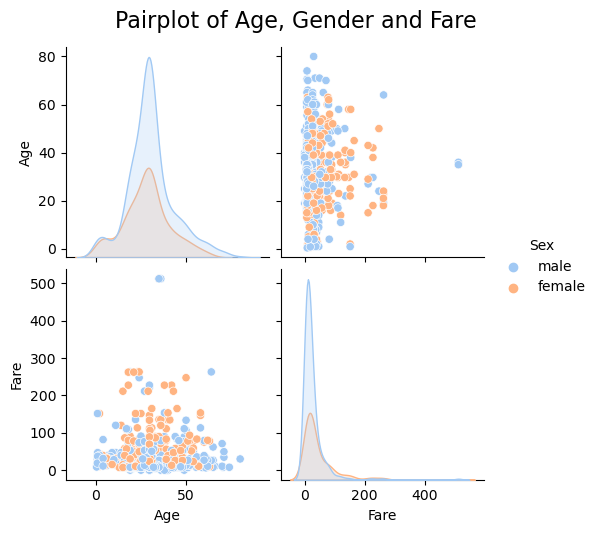

In [22]:
sns.pairplot(data=titanic_df, vars=['Age','Fare'],hue='Sex',palette='pastel')
plt.suptitle('Pairplot of Age, Gender and Fare',y=1.05, fontsize=16)
plt.show()

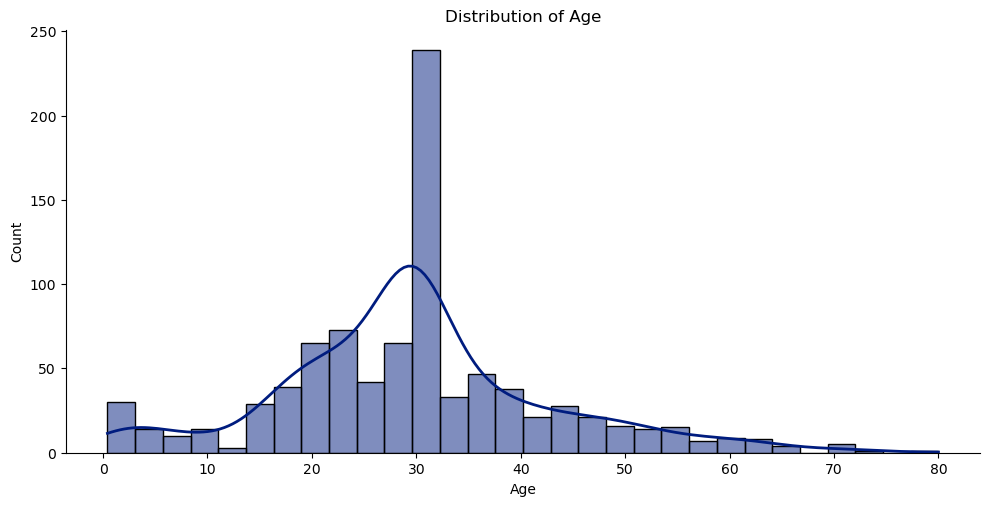

In [23]:
# plotting histogram to check age distribution 
sns.displot(data=titanic_df, x='Age', kde=True, color=sns.color_palette('dark')[0],line_kws={'linewidth':2},aspect=2)
plt.title('Distribution of Age')
plt.xlabel('Age')
plt.ylabel('Count')
plt.show()

**OBSERVATION:**

1. The majority of passengers fall within the age range of 20 to 40 years, based on the analysis of the dataset. This observation indicates that a significant portion of the passengers is between the ages of 20 and 40.
2. Maximum of passengers are in the age range of 29-32. 

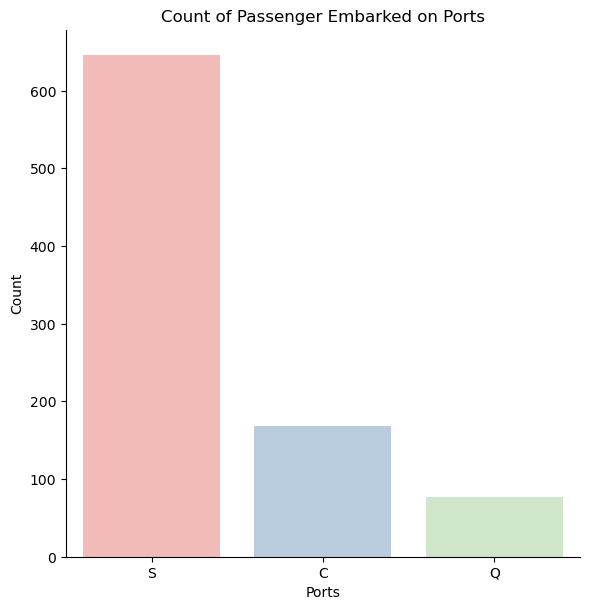

In [24]:
# plotting countplot 
sns.catplot(data=titanic_df, x='Embarked',kind='count',palette='Pastel1',height=6)
plt.title('Count of Passenger Embarked on Ports')
plt.xlabel('Ports')
plt.ylabel('Count')
plt.show()

There are three ports in our dataset from which passengers embarked on ship. They are :
S - **Southampton Port**, C- **Cherbourg Port**, Q - **Queenstown Port**

**OBSERVATION:**

1. The Southampton port had the highest number of embarked passengers, totaling around 650 individuals. This suggests that a substantial portion of the passengers boarded the ship from Southampton, making it the primary embarkation point.

2. Conversely, the Queenstown port had the lowest number of embarked passengers, with approximately 90 individuals. This indicates that Queenstown had the smallest contribution to the total number of embarked passengers among the analyzed ports.

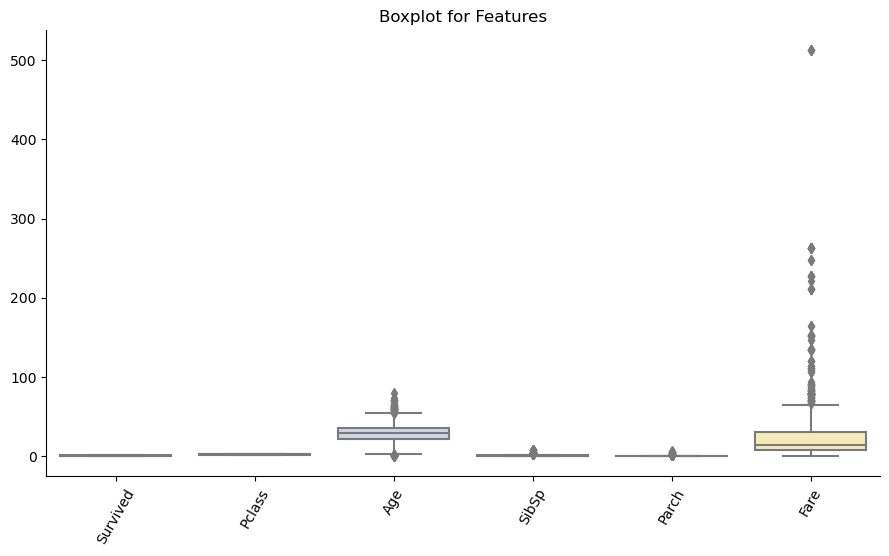

In [25]:
# plotting boxplot for each column in dataset
sns.catplot(data=titanic_df, kind='box',palette='Pastel2',aspect=1.8)
plt.title('Boxplot for Features')
plt.xticks(rotation=60)
plt.show()

**OBSERVATION:**

1. As anticipated, the presence of outliers in the 'Fare' column is consistent with expectations, given the potential variations in fare prices arising from different situations and passenger classes. 

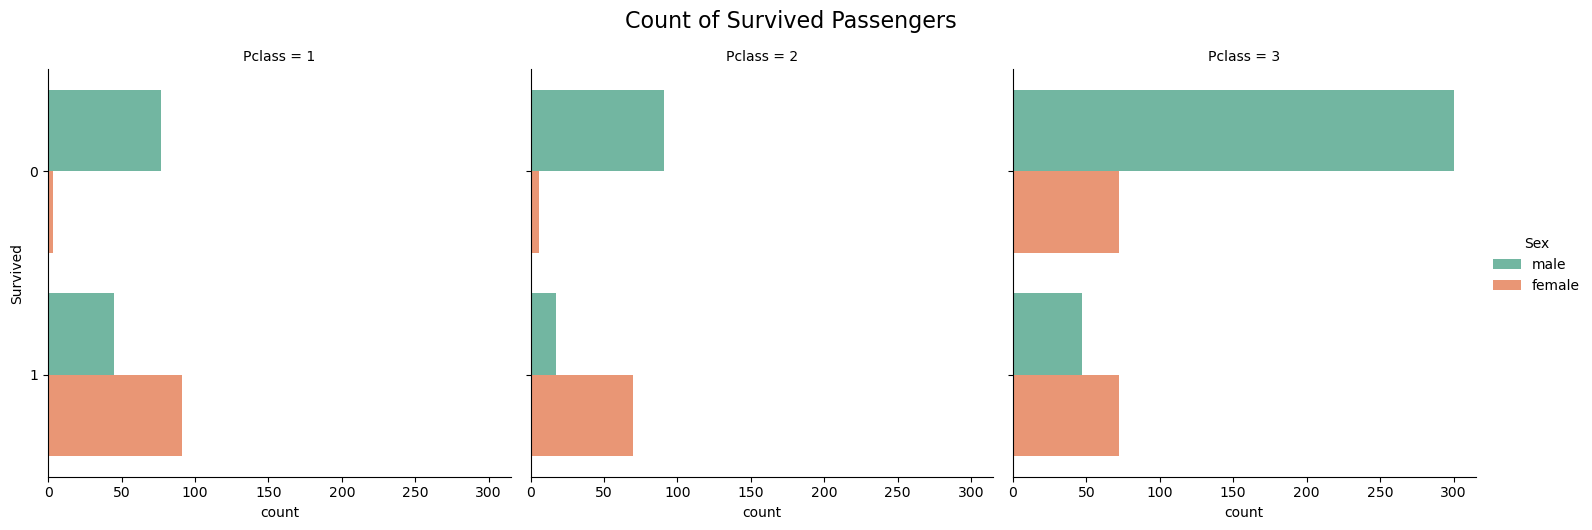

In [26]:
# plotting countplot by class wise
sns.catplot(data=titanic_df, y= 'Survived',kind='count',hue='Sex',palette='Set2',col='Pclass')
plt.suptitle('Count of Survived Passengers',y=1.05,fontsize=16)
plt.ylabel('Survived\n(1-Survived, 0-Not Survived)')
plt.show()

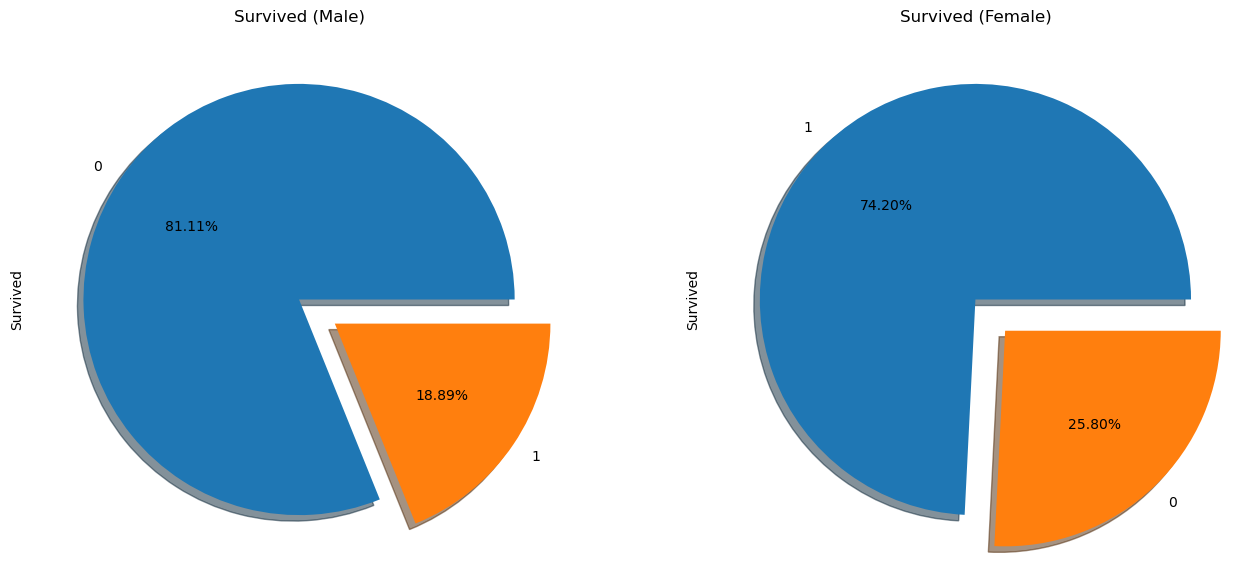

In [27]:
# plotting subplots 
fig, ax=plt.subplots(1,2, figsize=(16,7))
titanic_df['Survived'][titanic_df['Sex']=='male'].value_counts().plot.pie(explode=[0,0.2],
                                                                        autopct='%.2f%%',ax=ax[0],shadow=True)

titanic_df['Survived'][titanic_df['Sex']=='female'].value_counts().plot.pie(explode=[0,0.2],
                                                                           autopct='%.2f%%',ax=ax[1],shadow=True)
ax[0].set_title('Survived (Male)')
ax[1].set_title('Survived (Female)')

plt.show()

**OBSERVATION:**

1. The visual analysis above reveals a prioritization of females during rescue operations. It suggests that, in the aftermath of the disaster, efforts were concentrated on ensuring the safety and well-being of female passengers.

2. In contrast to females, the survival rate among males appears significantly lower, with only approximately 19% of male passengers surviving the disaster.

3. The visualization indicates that a significant proportion of male passengers did not survive the disaster. 

4. The rescue operations demonstrate a clear class-based prioritization, with the highest priority given to first-class passengers, followed by second-class passengers, and lastly, third-class passengers. This class-wise prioritization reflects a strategic approach to rescue efforts, where individuals from higher-class accommodations are attended to with greater urgency.
5. From above pie chart we can see that only 18.89% men and 25.80% females survived in disaster.